In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel('/home/samthekiller/Downloads/Projects/Machine Learning/Spotify/Final Dataset/songs.xls')

In [3]:
data.describe()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
count,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,1.468200e+04,14682.000000,14682.000000
mean,-0.079946,-0.029549,4.609249,-0.006266,-0.583123,-0.448552,-0.595446,-0.482371,-0.155506,119.871835,2.404064e+05,-8.447724,0.630568
std,26.080135,26.081806,26.443567,26.085725,26.066713,26.071495,26.067194,26.069647,26.078774,41.763557,9.077982e+04,26.180325,0.482667
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-999.000000,0.000000
25%,0.497000,0.510000,2.000000,0.000000,0.034500,0.017500,0.000000,0.092900,0.330000,96.985250,2.004922e+05,-9.451500,0.000000
50%,0.614500,0.684000,6.000000,1.000000,0.049100,0.098350,0.000005,0.129000,0.530000,119.770500,2.316930e+05,-6.815000,1.000000
75%,0.722000,0.823000,8.000000,1.000000,0.105000,0.358750,0.001650,0.258000,0.724000,139.841250,2.686000e+05,-5.084250,1.000000
max,0.986000,1.000000,11.000000,1.000000,0.956000,0.996000,0.991000,0.997000,0.992000,245.941000,4.802553e+06,0.316000,1.000000


In [4]:
indexNames=data[data['danceability']==-999].index

In [5]:
data.drop(indexNames,inplace=True)

In [8]:
data_new=data.drop('SpotifyID',axis=1)

In [21]:
data_new=data.drop('SpotifyID',axis=1)

NameError: name 'data_new' is not defined

In [9]:
y=data_new['is_hit']

In [10]:
data.drop('is_hit',axis=1,inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(data_new,y,test_size=0.33,random_state=42)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.33,random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()

In [15]:
X_train=scaler.fit_transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [17]:
X_cv=scaler.transform(X_cv)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [19]:
train_auc = []
cv_auc = []

parameters = {'C':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,2.5,5]}

for i in tqdm(parameters['C']):
    lr = LogisticRegression(C=i)
    lr.fit(X_train, y_train)

    y_train_pred = lr.predict(X_train)    
    y_cv_pred = lr.predict(X_cv)

    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [00:00<00:00, 35.11it/s]


In [20]:
import math
log_alphas=[]
for a in tqdm(parameters['C']):
    b = math.log10(a)
    log_alphas.append(b)

100%|██████████| 11/11 [00:00<00:00, 5893.13it/s]


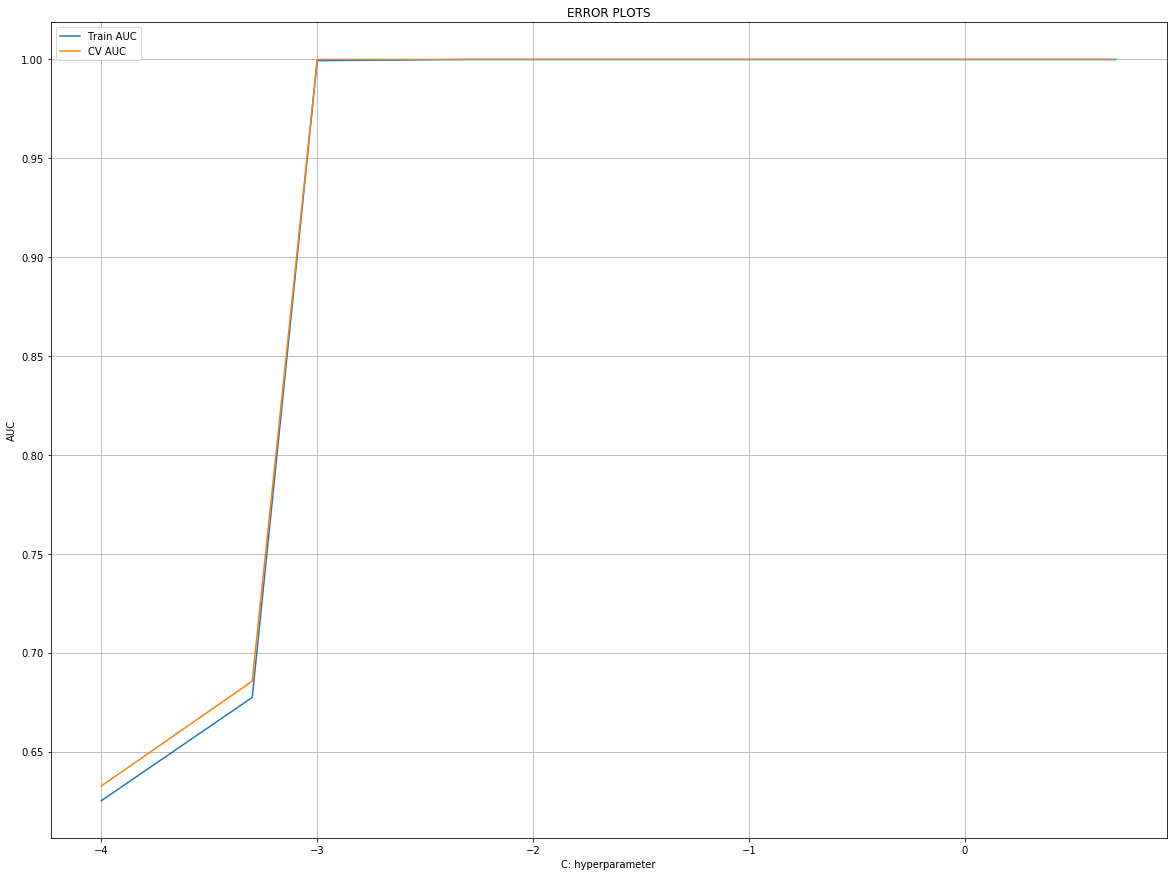

In [21]:
plt.figure(figsize=(20,15))
plt.plot(log_alphas, train_, label='Train AUC')
plt.plot(log_alphas, test_accuracy, label='CV AUC')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [22]:
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict(X_train)    
y_test_pred = lr.predict(X_test)


In [23]:
accuracy_score(y_train,y_train_pred)

1.0

In [24]:
accuracy_score(y_test, y_test_pred)

1.0